# Package `nelpy.plotting` examples

Here we will look at some of the different plot types and utilities in the `nelpy.plotting` module.

Let's start with the required imports.

In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

import nelpy as nel  # recommended import for nelpy
import nelpy.plotting as npl  # recommended import for the nelpy plotting library

%matplotlib inline

### Flexible scalebar implementation

Nelpy includes a powerful and flexible scalebar implementation based on an excellent gist by Dan Meliza (see https://gist.github.com/dmeliza/3251476). Nelpy extends the basic functionality in a number of ways, and formats the scalebar labels correctly.

Text(0.5, 1.0, 'autoscale; show axis')

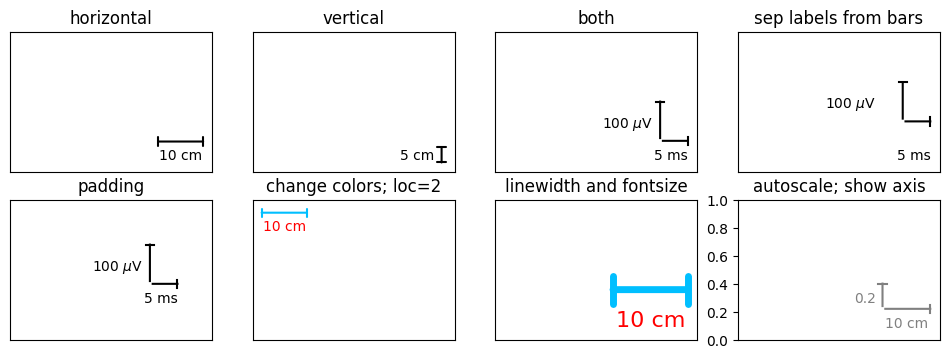

In [2]:
fig = plt.figure(1, figsize=(12, 4))
ax = fig.add_subplot(241)
npl.add_scalebar(ax=ax, sizex=0.25, labelx="10 cm")
ax.set_title("horizontal")
ax = fig.add_subplot(242)
npl.add_scalebar(ax=ax, sizey=0.15, labely="5 cm")
ax.set_title("vertical")
ax = fig.add_subplot(243)
npl.add_scalebar(ax=ax, sizex=0.15, sizey=0.3, labelx="5 ms", labely="100 $\mu$V")
ax.set_title("both")
ax = fig.add_subplot(244)
npl.add_scalebar(
    ax=ax, sizex=0.15, sizey=0.3, labelx="5 ms", labely="100 $\mu$V", sep=16
)
ax.set_title("sep labels from bars")
ax = fig.add_subplot(245)
npl.add_scalebar(
    ax=ax, sizex=0.15, sizey=0.3, labelx="5 ms", labely="100 $\mu$V", pad=2
)
ax.set_title("padding")
ax = fig.add_subplot(246)
npl.add_scalebar(ax=ax, sizex=0.25, labelx="10 cm", fc="red", ec="deepskyblue", loc=2)
ax.set_title("change colors; loc=2")
ax = fig.add_subplot(247)
npl.add_scalebar(
    ax=ax,
    sizex=0.4,
    labelx="10 cm",
    fc="red",
    ec="deepskyblue",
    lw=5,
    fontsize=16,
    sep=5,
)
ax.set_title("linewidth and fontsize")
ax = fig.add_subplot(248)
npl.add_scalebar(
    ax=ax, sizex=0.25, labelx="10 cm", matchy=True, fc="gray", ec="gray", hidey=False
)
ax.set_title("autoscale; show axis")

The options for the location (`loc`) parameter are listed below:

    'upper right'  : 1,
    'upper left'   : 2,
    'lower left'   : 3,
    'lower right'  : 4, default
    'right'        : 5,
    'center left'  : 6,
    'center right' : 7,
    'lower center' : 8,
    'upper center' : 9,
    'center'       : 10.

### Plotting spike rasters

D:\github\nelpy\nelpy\plotting\core.py:1296: UserWarning: Spike trains may be plotted in the same vertical position as another unit


<Axes: >

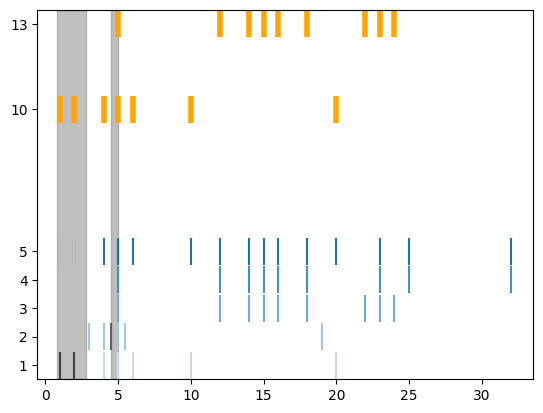

In [3]:
stdata1 = [1, 2, 4, 5, 6, 10, 20]
stdata2 = [3, 4, 4.5, 5, 5.5, 19]
stdata3 = [5, 12, 14, 15, 16, 18, 22, 23, 24]
stdata4 = [5, 12, 14, 15, 16, 18, 23, 25, 32]

ep1 = nel.EpochArray([[0.8, 2.8], [4.5, 5]])
# ep1 = EpochArray([[0.8, 2.8]])

sta1 = nel.SpikeTrainArray(
    [stdata1, stdata2, stdata3, stdata4, stdata1 + stdata4], fs=5
)
sta2 = nel.SpikeTrainArray(
    [stdata1, stdata2, stdata3, stdata4, stdata1 + stdata4], support=ep1, fs=5
)
sta3 = nel.SpikeTrainArray([stdata1, stdata3], fs=5, unit_ids=[10, 13])
plt.figure()
ax = plt.gca()
npl.rasterplot(sta1, cmap=plt.cm.Blues, ax=ax)
npl.rasterplot(sta2, cmap=plt.cm.gray, ax=ax)
npl.rasterplot(sta3, color="orange", lw=4, ax=ax)
npl.epochplot(sta2.support, ax=ax)

### EpochArray intersections

==== ep1 ====
<EpochArray at 0x2b9ee1b5bd0: 1 epoch> of length 3:20 minutes
==== ep2 ====
<EpochArray at 0x2b9ee2398d0: 1 epoch> of length 1:00 minutes
<EpochArray at 0x2b9edf67d90: 1 epoch> of length 20 seconds
<EpochArray at 0x2b9ee2398d0: 1 epoch> of length 40 seconds
<EpochArray at 0x2b9eb0bf510: 1 epoch> of length 50 seconds
== ep2[ep1] =
<EpochArray at 0x2b9ee358490: 1 epoch> of length 10 seconds
<EpochArray at 0x2b9ee2663d0: 1 epoch> of length 20 seconds
<EpochArray at 0x2b9eb0bf510: 1 epoch> of length 20 seconds


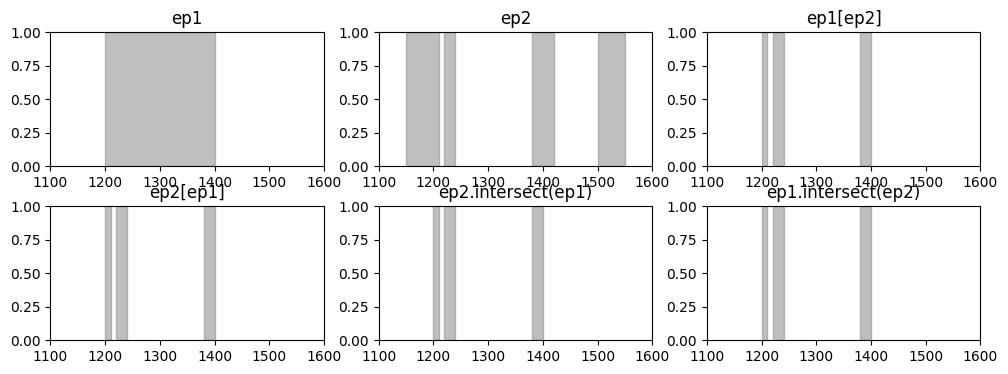

In [4]:
ep1 = nel.EpochArray([1200, 1400])
ep2 = nel.EpochArray([[1150, 1210], [1220, 1240], [1380, 1420], [1500, 1550]])

fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(2, 3, hspace=0.3)

ax1 = plt.subplot(gs[0])
npl.epochplot(ax=ax1, epochs=ep1, height=1)
ax1.set_xlim([1100, 1600])
ax1.set_title("ep1")

ax2 = plt.subplot(gs[1])
npl.epochplot(ax=ax2, epochs=ep2, height=1)
ax2.set_xlim([1100, 1600])
ax2.set_title("ep2")

ax3 = plt.subplot(gs[2])
npl.epochplot(ax=ax3, epochs=ep1[ep2], height=1)
ax3.set_xlim([1100, 1600])
ax3.set_title("ep1[ep2]")

ax4 = plt.subplot(gs[3])
npl.epochplot(ax=ax4, epochs=ep2[ep1], height=1)
ax4.set_xlim([1100, 1600])
ax4.set_title("ep2[ep1]")

ax5 = plt.subplot(gs[4])
npl.epochplot(ax=ax5, epochs=ep2.intersect(ep1, boundaries=True), height=1)
ax5.set_xlim([1100, 1600])
ax5.set_title("ep2.intersect(ep1)")

ax6 = plt.subplot(gs[5])
npl.epochplot(ax=ax6, epochs=ep1.intersect(ep2), height=1)
ax6.set_xlim([1100, 1600])
ax6.set_title("ep1.intersect(ep2)")

print("==== ep1 ====")
for ep in ep1:
    print(ep)
print("==== ep2 ====")
for ep in ep2:
    print(ep)
print("== ep2[ep1] =")
for ep in ep2[ep1]:
    print(ep)

### Multiple traces with no axis borders

<Axes: >

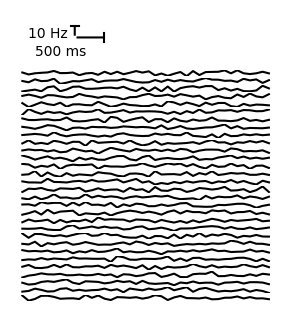

In [5]:
n_traces = 30

fig, axes = plt.subplots(n_traces, 1, figsize=(3.5, 3))

for ax in axes:
    data = np.random.randn(40)
    ax.plot(data, color="k")

npl.utils.clear_left_right(*axes)
npl.utils.clear_top_bottom(*axes)

npl.scalebar.add_scalebar(
    ax=axes[0], sizex=5, sizey=10, labely="10 Hz", labelx="500 ms", pad=1, loc=3
)